<a href="https://colab.research.google.com/github/enigmatized/NoGambleNoFuture/blob/main/SeeingIfBeingAMakeMakerOnDownHours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a quick study on if trying to do a form of market making on down hours, makes sense. I have a feeling backtesting this might seem like a good idea, but in practice, this is a game of speed and high optimization, which I would lose at because the biggest lagger I have is the internet and connection to the exchange, but there might be usefullness in markets that are less effcient. AKA crypto.

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Then I need to make some type of indicator
data = ['OANDA EURUSD, 5.csv']
df = pd.read_csv (data[0])
df = df.reset_index()


df['closeDelta']  = ( df['close'] - df['close'].shift(1) )
df['closeOpenDelta']  = ( df['close'] - df['open'] )
#Remove NA row
df = df.tail(-1)

df.head()


,index,time,open,high,low,close,Volume,Volume MA,closeDelta
1,1,1686266100,1.07840,1.07840,1.07828,1.07834,51,50.35,-0.00006
2,2,1686266400,1.07834,1.07846,1.07832,1.07840,59,51.80,0.00006
3,3,1686266700,1.07840,1.07846,1.07828,1.07828,108,53.10,-0.00012
4,4,1686267000,1.07828,1.07846,1.07828,1.07844,106,57.40,0.00016
5,5,1686267300,1.07844,1.07845,1.07839,1.07844,72,59.25,0.00000


In [ ]:
#THis would be a game of stats, basically, you want to find the range of during each time period. Within the 5min chart.
#The real data science way to do this is finding the range on the
#1min
#5min
#15min
#1hr

#Also you want to see how vol effects from pervious session
#Also there seems to be a dip pattern, if the off hours drift downward then there is a bounce up on the trader oopen hours

#You also want to check hours

In [ ]:
#Filter on time.
#So basically

In [ ]:
from collections import defaultdict
import requests
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime, timedelta, time
from urllib.error import HTTPError

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


CSVfiles = []
for file in os.listdir("./"):
  if file.endswith(".csv"):
    CSVfiles.append(file)
print(CSVfiles)


unixTimeConverter = lambda x : (datetime.fromtimestamp(x)).strftime('%Y-%m-%d %H:%M:%S')
unixTimeConverterNoDateJustTime = lambda x: (datetime.fromtimestamp(x) - timedelta(hours=4)).time()


allDfs = []


for x in CSVfiles:

  dfTemp = pd.read_csv(x)
  dfTemp['estTime']  = dfTemp['time'].apply(unixTimeConverter)
  dfTemp['timeOnly'] = dfTemp['time'].apply(unixTimeConverterNoDateJustTime)

  dfTemp['candleHeight']  = dfTemp.apply( lambda row:    max(row['open'],  row['close']) - min(row['open'],  row['close']), axis = 1 )
  allDfs.append(dfTemp)


['OANDA EURUSD, 5.csv']


In [ ]:
df = allDfs[0]
df.tail()

df['closeOpenDelta']  = ( df['close'] - df['open'] )
d_counts_average_vol = defaultdict(list)
d_counts_average_highLow_diff = defaultdict(list)

for index, row in df.iterrows():
  #put volumes in d
  time_ = row['timeOnly']
  # print(str(time_))
  volume = row['Volume']
  d_counts_average_vol[str(time_)].append(volume)

  #priceDiffInD
  price_delta = row['closeOpenDelta']
  d_counts_average_highLow_diff[str(time_)].append(price_delta)

In [ ]:
d1 = {}
d2 = {}
for k, v in d_counts_average_highLow_diff.items():
  d2[k]= sum(v)/len(v)
  print(k)
  ls_priceDeta = d_counts_average_vol[k]
  if len(ls_priceDeta) != 0:
    d1[k] = sum(ls_priceDeta)/len(ls_priceDeta)


19:10:00
19:15:00
19:20:00
19:25:00
19:30:00
19:35:00
19:40:00
19:45:00
19:50:00
19:55:00
20:00:00
20:05:00
20:10:00
20:15:00
20:20:00
20:25:00
20:30:00
20:35:00
20:40:00
20:45:00
20:50:00
20:55:00
21:00:00
21:05:00
21:10:00
21:15:00
21:20:00
21:25:00
21:30:00
21:35:00
21:40:00
21:45:00
21:50:00
21:55:00
22:00:00
22:05:00
22:10:00
22:15:00
22:20:00
22:25:00
22:30:00
22:35:00
22:40:00
22:45:00
22:50:00
22:55:00
23:00:00
23:05:00
23:10:00
23:15:00
23:20:00
23:25:00
23:30:00
23:35:00
23:40:00
23:45:00
23:50:00
23:55:00
00:00:00
00:05:00
00:10:00
00:15:00
00:20:00
00:25:00
00:30:00
00:35:00
00:40:00
00:45:00
00:50:00
00:55:00
01:00:00
01:05:00
01:10:00
01:15:00
01:20:00
01:25:00
01:30:00
01:35:00
01:40:00
01:45:00
01:50:00
01:55:00
02:00:00
02:05:00
02:10:00
02:15:00
02:20:00
02:25:00
02:30:00
02:35:00
02:40:00
02:45:00
02:50:00
02:55:00
03:00:00
03:05:00
03:10:00
03:15:00
03:20:00
03:25:00
03:30:00
03:35:00
03:40:00
03:45:00
03:50:00
03:55:00
04:00:00
04:05:00
04:10:00
04:15:00
04:20:00
0

In [ ]:
for k, v in d2.items():
  print(k, v)

19:10:00 -2.3333333333325828e-05
19:15:00 1.833333333336709e-05
19:20:00 3.2777777777745795e-05
19:25:00 -7.444444444445104e-05
19:30:00 2.499999999999108e-05
19:35:00 2.6111111111146476e-05
19:40:00 2.388888888887269e-05
19:45:00 -7.222222222220193e-06
19:50:00 1.6666666666405778e-06
19:55:00 -1.4999999999987246e-05
20:00:00 -2.0555555555554525e-05
20:05:00 -1.3888888888881192e-05
20:10:00 -2.9999999999999164e-05
20:15:00 -4.777777777780706e-05
20:20:00 -6.111111111089467e-06
20:25:00 -1.4444444444440387e-05
20:30:00 -3.500000000000725e-05
20:35:00 2.1666666666672915e-05
20:40:00 -3.888888888888461e-05
20:45:00 -2.166666666663591e-05
20:50:00 -9.833333333336075e-05
20:55:00 3.7222222222219356e-05
21:00:00 5.7222222222214685e-05
21:05:00 -3.333333333331733e-05
21:10:00 -4.000000000002767e-05
21:15:00 6.722222222225553e-05
21:20:00 -6.277777777778197e-05
21:25:00 1.1111111111109887e-05
21:30:00 6.666666666660998e-06
21:35:00 4.499999999997407e-05
21:40:00 -0.00013166666666666573
21:45:0

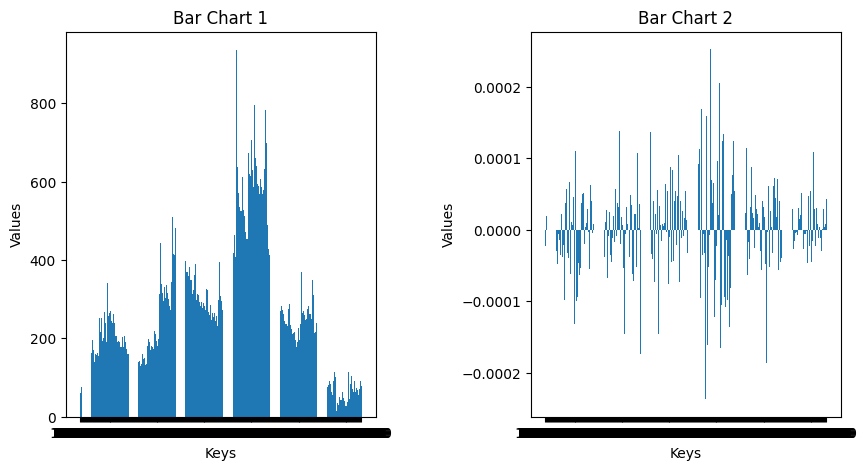

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample dictionaries
dict1 =  d1
dict2 =  d2

# Extract keys and values from dictionaries
keys1 = list(dict1.keys())
values1 = list(dict1.values())

keys2 = list(dict2.keys())
values2 = list(dict2.values())

# Set the figure size
plt.figure(figsize=(10, 5))

# Plotting the first bar chart
plt.subplot(1, 2, 1)
plt.bar(range(len(keys1)), values1, align='center')
plt.xticks(np.arange(len(keys1)), keys1)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar Chart 1')

# Plotting the second bar chart
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(keys2)), values2, align='center')
plt.xticks(np.arange(len(keys2)), keys2)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar Chart 2')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()


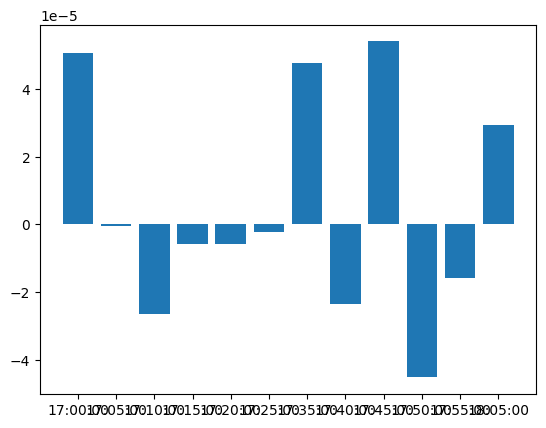

In [ ]:
[ (k, v) for k, v in d1.items() if v < 50]
d5 =  {k: d2[k] for k, v in d1.items() if v < 50}
data = d5
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

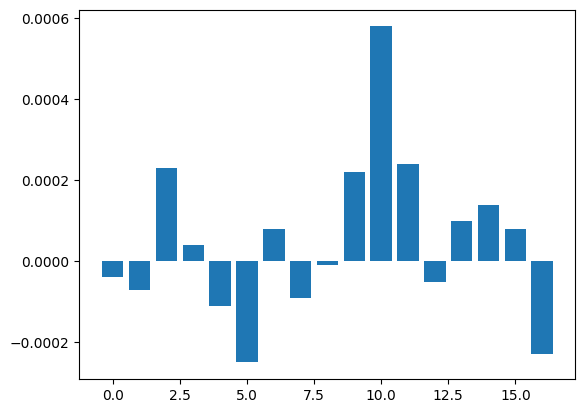

In [ ]:
values = d_counts_average_highLow_diff['17:00:00']



plt.bar(range(len(values)), values)
plt.show()

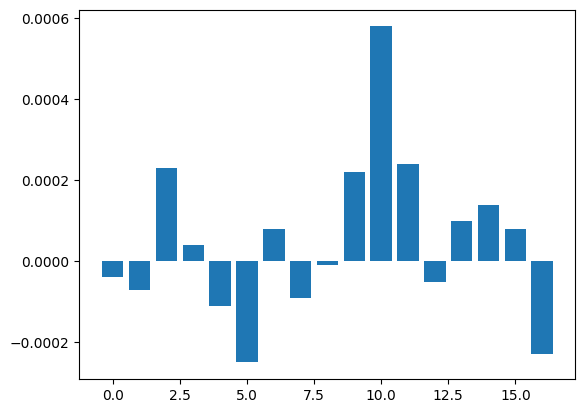

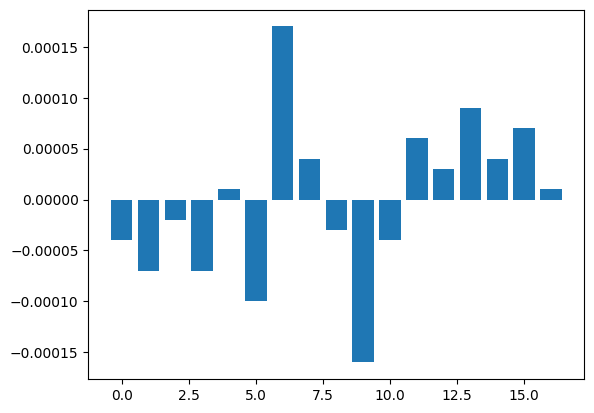

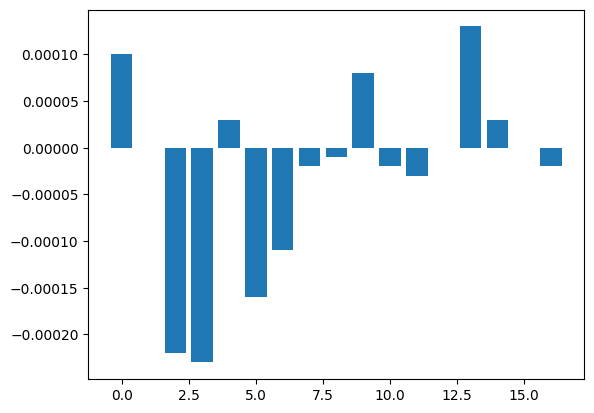

In [ ]:
values = d_counts_average_highLow_diff['17:00:00']
plt.bar(range(len(values)), values)
plt.show()
values = d_counts_average_highLow_diff['17:05:00']
plt.bar(range(len(values)), values)
plt.show()
values = d_counts_average_highLow_diff['17:10:00']
plt.bar(range(len(values)), values)
plt.show()